In [34]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import random
import warnings


In [36]:
# read in the three csvs:  education data;  df of clean FIPs, df of contaminated FIPS

Education = pd.read_csv('Education.csv')
Education.head()

FIPS_Contaminated = pd.read_csv("subset_Contaminated_FIPS_df.csv")
#print(len(FIPS_Contaminated))


FIPS_Clean = pd.read_csv("Clean_Fips.csv")
FIPS_Clean.reset_index(level=0, inplace=True)
#print(len(FIPS_Clean))

warnings.filterwarnings("ignore")

In [31]:
#create an education dataframe with only the CLEAN FIPs
#Percent(1) = some high school
#Percent(2) = diploma
#Percent(3) = some college
#Percent(4) = college graduate or higher

FIPs_clean_education = Education.loc[Education["FIPS Code"].isin(FIPS_Clean["FIPS"])==True]
FIPs_clean_education.sort_values(["FIPS Code"])
#FIPs_clean_education.sort_values(["Percent(1)"])
    

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18",Percent(1),Percent(2),Percent(3),Percent(4)
1728,31075,NE,Grant County,9.0,12.0,9.0,12.0,139,215,63,...,34.3,24.7,16,183,170,124,3.2,37.1,34.5,25.2
1256,25019,MA,Nantucket County,7.0,11.0,7.0,11.0,764,943,274,...,25.4,38.4,380,"1,476","2,021","4,148",4.7,18.4,25.2,51.7
989,20153,KS,Rawlins County,9.0,12.0,9.0,12.0,"1,163",931,278,...,34.2,15.9,96,565,730,465,5.2,30.4,39.3,25.1
513,13219,GA,Oconee County,3.0,2.0,3.0,2.0,"2,534",982,292,...,23.5,39.8,"1,327","4,752","5,739","12,366",5.5,19.6,23.7,51.1
1770,31159,NE,Seward County,2.0,2.0,2.0,2.0,"3,516","2,716",690,...,33.0,22.6,643,"2,916","4,119","3,165",5.9,26.9,38.0,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,21025,KY,Breathitt County,7.0,12.0,7.0,12.0,"5,409",701,348,...,16.4,10.0,"2,409","3,364","2,148","1,323",26.1,36.4,23.2,14.3
161,5077,AR,Lee County,6.0,4.0,7.0,9.0,"7,120","1,067",337,...,19.3,7.3,"1,831","2,770","1,578",607,27.0,40.8,23.3,8.9
501,13193,GA,Macon County,6.0,6.0,6.0,6.0,"4,715",596,473,...,18.0,10.0,"2,604","3,259","2,874",820,27.2,34.1,30.1,8.6
2606,48061,TX,Cameron County,2.0,2.0,2.0,2.0,"42,191","11,869","5,986",...,21.8,13.4,"80,565","63,733","58,823","42,411",32.8,26.0,24.0,17.3


In [6]:
#create an education dataframe with only the CONTAMINATED FIPS

FIPs_contaminated_education = Education.loc[Education["FIPS Code"].isin(FIPS_Contaminated["SEMS_ACTIVE_SITES.SITE_FIPS_CODE"])==True]
FIPs_contaminated_education.sort_values(["FIPS Code"])
#FIPs_clean_education.count()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18",Percent(1),Percent(2),Percent(3),Percent(4)
24,1045,AL,Dale County,4.0,5.0,4.0,5.0,"9,412","7,274","2,511",...,34.6,14.0,"4,732","10,924","12,036","5,690",14.2,32.7,36.1,17.0
73,2020,AK,Anchorage Municipality,2.0,2.0,2.0,2.0,"13,711","24,301","9,878",...,37.2,28.9,"11,867","45,753","66,655","67,719",6.2,23.8,34.7,35.3
77,2070,AK,Dillingham Census Area,9.0,12.0,9.0,12.0,949,191,107,...,26.3,16.4,370,"1,138",835,559,12.7,39.2,28.8,19.3
83,2130,AK,Ketchikan Gateway Borough,7.0,8.0,7.0,8.0,"1,794","1,844",668,...,39.8,20.2,701,"2,865","3,671","2,343",7.3,29.9,38.3,24.5
90,2185,AK,North Slope Borough,7.0,11.0,7.0,11.0,836,93,37,...,25.4,17.0,666,"2,797","1,968","1,079",10.2,43.0,30.2,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,56001,WY,Albany County,4.0,5.0,4.0,5.0,"3,011","2,976","2,374",...,27.5,44.1,848,"3,383","6,333","10,531",4.0,16.0,30.0,49.9
3185,56009,WY,Converse County,6.0,6.0,6.0,6.0,"1,255","1,359",455,...,36.3,14.7,962,"3,627","3,274","1,629",10.1,38.2,34.5,17.2
3196,56031,WY,Platte County,7.0,11.0,7.0,11.0,"1,746","1,380",469,...,31.2,15.2,415,"2,333","2,181","1,369",6.6,37.0,34.6,21.7
3269,72127,PR,San Juan Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,20.3,28.9,"48,567","54,376","54,284","89,207",19.7,22.1,22.0,36.2


In [49]:
# get the average education for each sample set

CleanP1 = np.mean(FIPs_clean_education["Percent(1)"])
CleanP2 = np.mean(FIPs_clean_education["Percent(2)"])
CleanP3 = np.mean(FIPs_clean_education["Percent(3)"])
CleanP4 = np.mean(FIPs_clean_education["Percent(4)"])
#CleanP4

ContP1 = np.mean(FIPs_contaminated_education["Percent(1)"])
ContP2 = np.mean(FIPs_contaminated_education["Percent(2)"])
ContP3 = np.mean(FIPs_contaminated_education["Percent(3)"])
ContP4 = np.mean(FIPs_contaminated_education["Percent(4)"])
#ContP4

#create a dataframe
x_axis = ["Some High School Completed", "High School Diploma", "Some College Completed", "College Graduate or Higher"]
y_axis_df = pd.DataFrame({
    
    "Clean FIPS":[CleanP1, CleanP2, CleanP3, CleanP4],
    "Contaminated FIPS": [ContP1, ContP2, ContP3, ContP4]
    
}, index= x_axis)
y_axis_df


,Clean FIPS,Contaminated FIPS
Some High School Completed,14.395960,11.619192
High School Diploma,35.059596,28.929293
Some College Completed,31.088889,31.035354
College Graduate or Higher,19.462626,28.414141


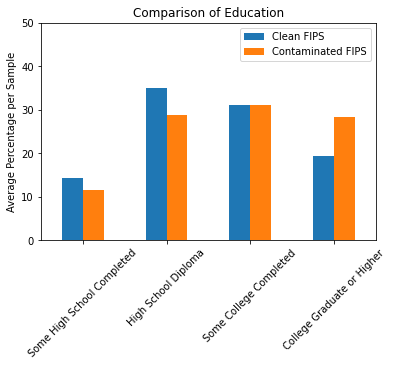

In [62]:

# create a multiplot bar chart for the four levels of education for each Sample

PLOT = y_axis_df.plot.bar(rot=45)
PLOT

plt.title("Comparison of Education")
plt.ylabel("Average Percentage per Sample")
plt.ylim(0,50)

plt.savefig("Education_barchart.png")

In [39]:
# remove the "BLANK" data from "Clean FIPs dataframe"
FIPs_clean_education2= FIPs_clean_education.dropna(subset=["Percent(1)"])

print(len(FIPs_clean_education2))

#assign datasets for each Sample subsets to be plotted
CleanP1_b = (FIPs_clean_education2["Percent(1)"])
CleanP2_b = (FIPs_clean_education2["Percent(2)"])
CleanP3_b = (FIPs_clean_education2["Percent(3)"])
CleanP4_b = (FIPs_clean_education2["Percent(4)"])
#CleanP1_b.head()

ContP1_b = (FIPs_contaminated_education["Percent(1)"])
ContP2_b = (FIPs_contaminated_education["Percent(2)"])
ContP3_b = (FIPs_contaminated_education["Percent(3)"])
ContP4_b = (FIPs_contaminated_education["Percent(4)"])
#ContP4_b.head()

99


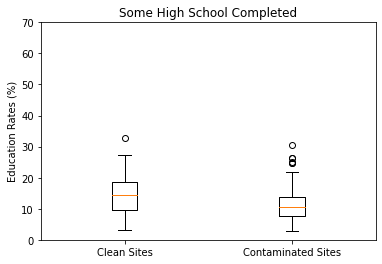

<Figure size 432x288 with 0 Axes>

In [76]:
# plot the box-whisker plots for each sample
plt.boxplot([CleanP1_b, ContP1_b], labels =["Clean Sites", "Contaminated Sites"])
plt.ylabel("Education Rates (%)")
plt.title("Some High School Completed")
plt.ylim(0,70)
plt.show() 
plt.savefig("some HS.png")

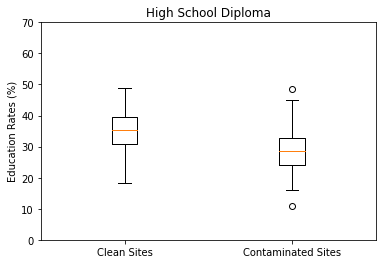

<Figure size 432x288 with 0 Axes>

In [77]:
plt.boxplot([CleanP2_b,ContP2_b], labels =["Clean Sites", "Contaminated Sites"])
plt.ylabel("Education Rates (%)")
plt.title("High School Diploma")
plt.ylim(0,70)
plt.show()
plt.savefig("HS.png")

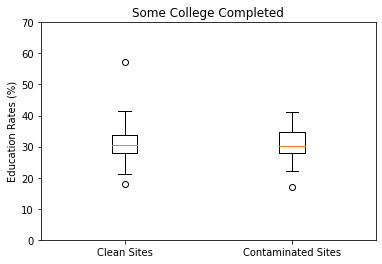

<Figure size 432x288 with 0 Axes>

In [78]:
plt.boxplot([CleanP3_b,ContP3_b], labels =["Clean Sites", "Contaminated Sites"])
plt.ylabel("Education Rates (%)")
plt.title("Some College Completed")
plt.ylim(0,70)
plt.show()
plt.savefig("some college.png")

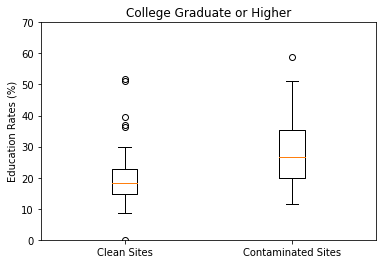

<Figure size 432x288 with 0 Axes>

In [79]:
                          
plt.boxplot([CleanP4_b,ContP4_b], labels =["Clean Sites", "Contaminated Sites"])
plt.ylabel("Education Rates (%)")
plt.title("College Graduate or Higher")
plt.ylim(0,70)
plt.show()                        
plt.savefig("college grad.png")               